In [4]:
%pylab inline  
import GPy
import GPyOpt
from numpy.random import seed
import matplotlib

Populating the interactive namespace from numpy and matplotlib


In [5]:
pyplot.set_cmap('jet')

## Initialise target function

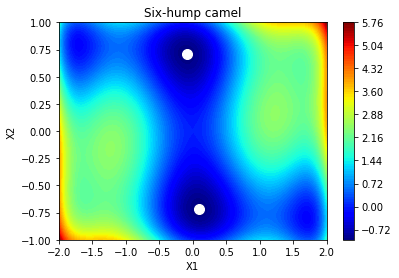

In [6]:
# create the object function
f_true = GPyOpt.objective_examples.experiments2d.sixhumpcamel()
f_sim = GPyOpt.objective_examples.experiments2d.sixhumpcamel()
bounds =[{'name': 'var_1', 'type': 'continuous', 'domain': f_true.bounds[0]},
         {'name': 'var_2', 'type': 'continuous', 'domain': f_true.bounds[1]}]
f_true.plot()

This functions has two global minimum, at $(0.0898,−0.7126)$ and $(−0.0898,0.7126)$. 

## Using BayesOpt

In [7]:
myOpt = GPyOpt.methods.BayesianOptimization(f_sim.f,
                                              domain=bounds,
                                              model_type = 'GP',
                                              acquisition_type='EI',  
                                              normalize_Y = True,
                                              acquisition_weight = 2)    

In [8]:
max_iter = 40  # maximum time 40 iterations
max_time = 60  # maximum time 60 seconds

myOpt.run_optimization(max_iter,max_time,verbosity=False)   

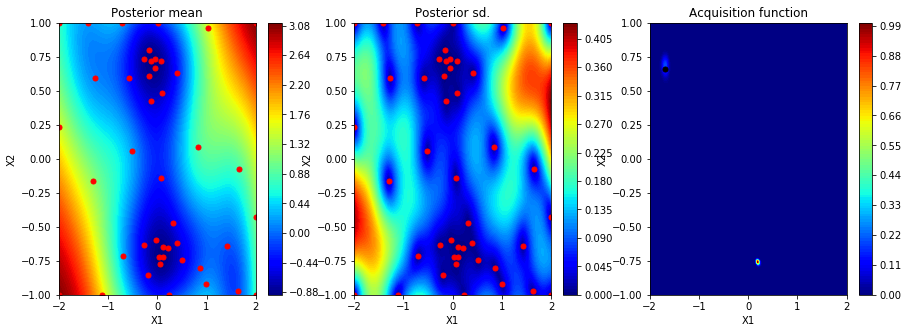

In [9]:
myOpt.plot_acquisition() 

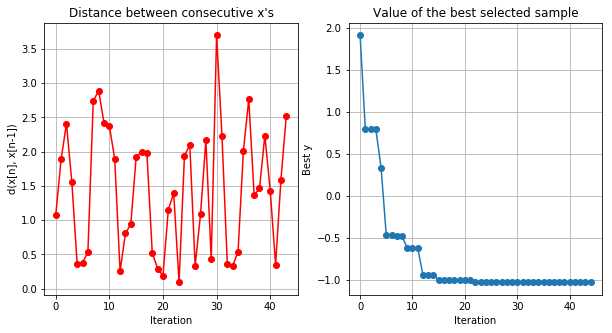

In [10]:
myOpt.plot_convergence()

In [20]:
x = np.array([-0.0898,0.7126])
f_sim.f(x)

array([[-1.03162842]])

In [13]:
min_index = np.argmin(myOpt.Y)
x_best = myOpt.X[min_index,:]
y_best = myOpt.Y[min_index,:]
print(x_best)
print(y_best)

[ 0.10905159 -0.71874616]
[-1.03000613]


## Using PyGMO

In [14]:
f_true.bounds[0]

(-2, 2)

In [15]:
f_true.bounds[1]

(-1, 1)

In [16]:
import pygmo as pg

In [40]:
class user_function:
    def __init__(self, f):
        self.f = f
    def fitness(self, x):
        return self.f(x).flatten()
    def get_bounds(self):
        return ([-2,-1], [2,1])

In [41]:
prob = pg.problem(user_function(f_sim.f))

In [43]:
algo = pg.algorithm(pg.bee_colony(gen = 20, limit = 20))
pop = pg.population(prob,10)
pop = algo.evolve(pop)

In [44]:
print(pop.champion_x) 
print(pop.champion_f) 

[-0.08979833  0.71196926]
[-1.03162461]
